In [3]:
import torch as _torch
import numpy as np
import vamb4
# from vamb4 import graph
import latent_visual
import matplotlib.pyplot as plt
import json
import os
import seaborn as sns
import pandas as pd

/Users/liuxinyuan/miniforge3/lib/python3.9/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.24.2
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [10]:
gamma_list = [0,0.01,0.02,0.05,0.1]

In [196]:
def read_log(log_path):
    loss_list = []
    with open(log_path,'r') as f:
        lines = f.readlines()
        for i, line in enumerate(lines):
            parts = line.split('\t')
            if len(parts)>1 and parts[1].startswith('Epoch:'):
                ce = float(parts[3].split(': ')[1])
                kld = float(parts[5].split(': ')[1])
                sse = float(parts[4].split(': ')[1])
                dist = float(parts[6].split(': ')[1])
                loss_list.append((ce,sse,kld,dist))

    return loss_list

In [197]:
model = 'sagenew_z_neg'
loss_230_0 = read_log('errorfree/{}/log_oral_0508_230_0.txt'.format(model))
loss_230_001 = read_log('errorfree/{}/log_oral_0509_230_0.01.txt'.format(model))
loss_230_002 = read_log('errorfree/{}/log_oral_0508_230_0.02.txt'.format(model))
loss_230_005 = read_log('errorfree/{}/log_oral_0508_230_0.05.txt'.format(model))
loss_230_01 = read_log('errorfree/{}/log_oral_0507_230_0.1.txt'.format(model))


In [259]:
loss_gamma_list_cos = []
for gamma in gamma_list:
    loss_gamma_list_cos.append(read_log('errorfree/thesis_ef/lin_cos/log_oral_0511_230_{}.txt'.format(gamma)))
ce_gamma_list_cos = [[loss[0] for loss in loss_list] for loss_list in loss_gamma_list_cos]
sse_gamma_list_cos = [[loss[1] for loss in loss_list] for loss_list in loss_gamma_list_cos]
kld_gamma_list_cos = [[loss[2] for loss in loss_list] for loss_list in loss_gamma_list_cos]
dist_gamma_list_cos = [[loss[3] for loss in loss_list] for loss_list in loss_gamma_list_cos]

In [239]:
loss_gamma_list = [loss_230_0,loss_230_001,loss_230_002,loss_230_005,loss_230_01]
ce_gamma_list = [[loss[0] for loss in loss_list] for loss_list in loss_gamma_list]
sse_gamma_list = [[loss[1] for loss in loss_list] for loss_list in loss_gamma_list]
kld_gamma_list = [[loss[2] for loss in loss_list] for loss_list in loss_gamma_list]
dist_gamma_list = [[loss[3] for loss in loss_list] for loss_list in loss_gamma_list]


In [275]:
from math import log
for i,ce_list in enumerate(ce_gamma_list_cos):
    ce_gamma_list_cos[i] = np.array(ce_list) * (1-0.15) / log(10)

for i,kld_list in enumerate(kld_gamma_list_cos):
    kld_gamma_list_cos[i] = np.array(kld_list) / (32 * 230)

for i,sse_list in enumerate(sse_gamma_list_cos):
    sse_gamma_list_cos[i] = np.array(sse_list) * 0.15 / 103

Text(0.5, 1.0, 'Dist curve with $\\beta=230$')

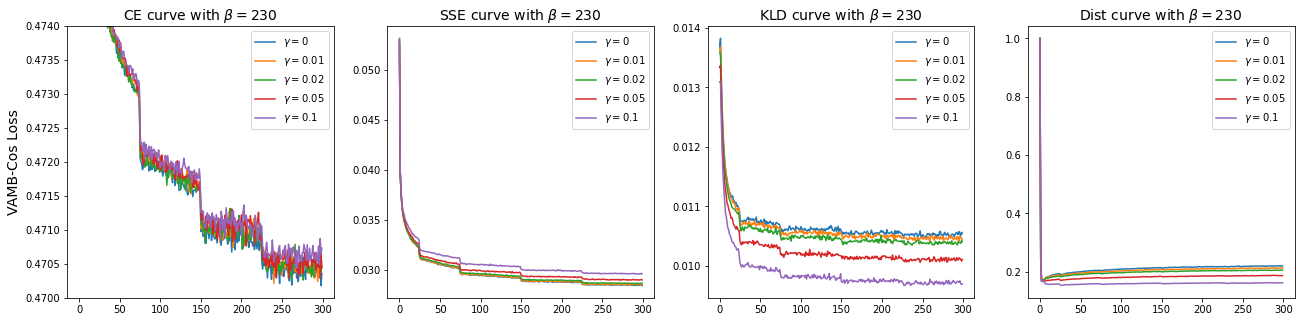

In [281]:
epochs = list(range(300))

plt.figure(figsize=(22,5))

plt.subplot(1,4,1)
for i,ces in enumerate(ce_gamma_list_cos):
    plt.plot(epochs,np.array(ces),label = r'$\gamma={}$'.format(gamma_list[i]))
plt.legend()
plt.ylabel('VAMB-Cos Loss',fontdict={'fontsize':14})
# plt.xlabel('Epoch',fontdict={'fontsize':14})
plt.ylim(0.47,0.474)
# plt.ylim(1.2735,1.283)
# plt.yscale('log')
plt.title(r'CE curve with $\beta=230$',fontdict={'fontsize':14})

plt.subplot(1,4,3)
for i,klds in enumerate(kld_gamma_list_cos):
    plt.plot(epochs,np.array(klds),label = r'$\gamma={}$'.format(gamma_list[i]))
plt.legend()
# plt.ylabel('Loss',fontdict={'fontsize':14})
# plt.xlabel('Epoch',fontdict={'fontsize':14})
# plt.ylim(70,85)
plt.title(r'KLD curve with $\beta=230$',fontdict={'fontsize':14})

plt.subplot(1,4,2)
for i,sses in enumerate(sse_gamma_list_cos):
    plt.plot(epochs,np.array(sses),label = r'$\gamma={}$'.format(gamma_list[i]))
plt.legend()
# plt.ylabel('SSE loss')
# plt.ylabel('Loss',fontdict={'fontsize':14})
# plt.xlabel('Epoch',fontdict={'fontsize':14})
# plt.ylim(19,23)
plt.title(r'SSE curve with $\beta=230$',fontdict={'fontsize':14})

plt.subplot(1,4,4)
for i,ds in enumerate(dist_gamma_list_cos):
    plt.plot(epochs,np.array(ds),label = r'$\gamma={}$'.format(gamma_list[i]))
plt.legend()
# plt.ylabel('Dist loss')
# plt.xlabel('Epoch',fontdict={'fontsize':14})
# plt.ylim(0.13,0.3)
# plt.ylim(19,23)
plt.title(r'Dist curve with $\beta=230$',fontdict={'fontsize':14})

# plt.savefig('graphvamb_plot/loss_230_cos.png',dpi=300)

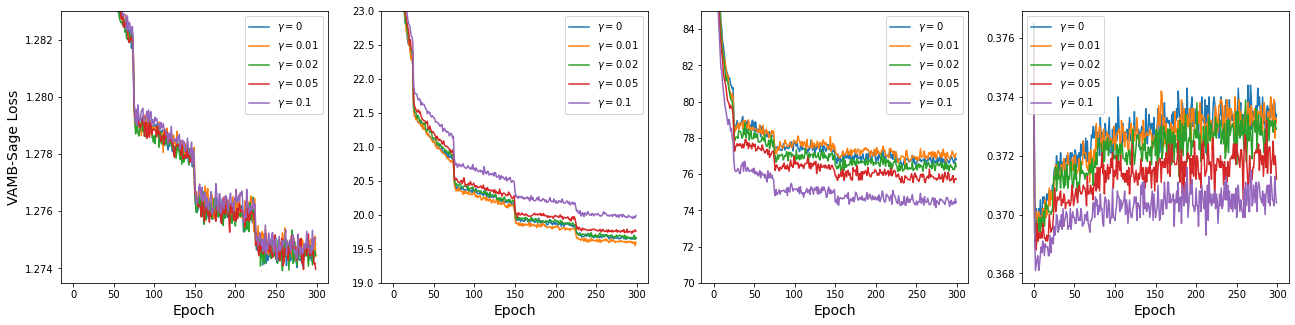

In [269]:
epochs = list(range(300))

plt.figure(figsize=(22,5))

plt.subplot(1,4,1)
for i,ces in enumerate(ce_gamma_list):
    plt.plot(epochs,np.array(ces),label = r'$\gamma={}$'.format(gamma_list[i]))
plt.legend()
plt.ylabel('VAMB-Sage Loss',fontdict={'fontsize':14})
plt.xlabel('Epoch',fontdict={'fontsize':14})
plt.ylim(1.2735,1.283)
# plt.yscale('log')
# plt.title(r'CE curve with $\beta=230$',fontdict={'fontsize':14})

plt.subplot(1,4,3)
for i,klds in enumerate(kld_gamma_list):
    plt.plot(epochs,np.array(klds),label = r'$\gamma={}$'.format(gamma_list[i]))
plt.legend()
# plt.ylabel('Loss',fontdict={'fontsize':14})
plt.xlabel('Epoch',fontdict={'fontsize':14})
plt.ylim(70,85)
# plt.title(r'KLD curve with $\beta=230$',fontdict={'fontsize':14})

plt.subplot(1,4,2)
for i,sses in enumerate(sse_gamma_list):
    plt.plot(epochs,np.array(sses),label = r'$\gamma={}$'.format(gamma_list[i]))
plt.legend()
# plt.ylabel('SSE loss')
# plt.ylabel('Loss',fontdict={'fontsize':14})
plt.xlabel('Epoch',fontdict={'fontsize':14})
plt.ylim(19,23)
# plt.title(r'SSE curve with $\beta=230$',fontdict={'fontsize':14})

plt.subplot(1,4,4)
for i,ds in enumerate(dist_gamma_list):
    plt.plot(epochs,np.array(ds),label = r'$\gamma={}$'.format(gamma_list[i]))
plt.legend()
# plt.ylabel('Dist loss')
plt.xlabel('Epoch',fontdict={'fontsize':14})
# plt.ylim(19,23)
# plt.title(r'Dist curve with $\beta=230$',fontdict={'fontsize':14})

plt.savefig('graphvamb_plot/loss_230_sage.png',dpi=300)

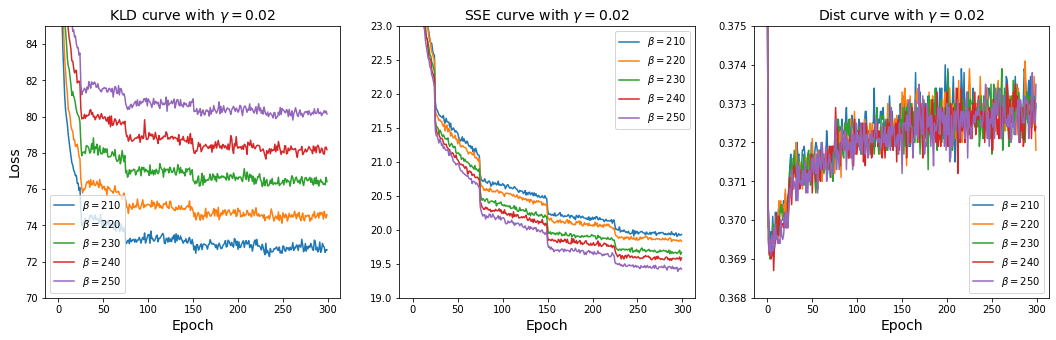

In [129]:
beta_list = [210,220,230,240,250]

loss_210 = read_log('errorfree/sagenew_z_neg/log_oral_0508_210_0.02.txt')
loss_220 = read_log('errorfree/sagenew_z_neg/log_oral_0508_220_0.02.txt')
loss_230 = read_log('errorfree/sagenew_z_neg/log_oral_0508_230_0.02.txt')
loss_240 = read_log('errorfree/sagenew_z_neg/log_oral_0509_240_0.02.txt')
loss_250 = read_log('errorfree/sagenew_z_neg/log_oral_0509_250_0.02.txt')

loss_beta_list = [loss_210,loss_220,loss_230,loss_240,loss_250]
kld_beta_list = [[loss[1] for loss in loss_list] for loss_list in loss_beta_list]
sse_beta_list = [[loss[0] for loss in loss_list] for loss_list in loss_beta_list]
dist_beta_list = [[loss[2] for loss in loss_list] for loss_list in loss_beta_list]

epochs = list(range(300))

plt.figure(figsize=(18,5))
plt.subplot(1,3,1)
for i,klds in enumerate(kld_beta_list):
    plt.plot(epochs,np.array(klds),label = r'$\beta={}$'.format(beta_list[i]))
plt.legend()
plt.ylabel('Loss',fontdict={'fontsize':14})
plt.xlabel('Epoch',fontdict={'fontsize':14})
plt.ylim(70,85)
plt.title(r'KLD curve with $\gamma=0.02$',fontdict={'fontsize':14})

plt.subplot(1,3,2)
for i,sses in enumerate(sse_beta_list):
    plt.plot(epochs,np.array(sses),label = r'$\beta={}$'.format(beta_list[i]))
plt.legend()
# plt.ylabel('SSE loss')
plt.xlabel('Epoch',fontdict={'fontsize':14})
plt.ylim(19,23)
plt.title(r'SSE curve with $\gamma=0.02$',fontdict={'fontsize':14})

plt.subplot(1,3,3)
for i,ds in enumerate(dist_beta_list):
    plt.plot(epochs,np.array(ds),label = r'$\beta={}$'.format(beta_list[i]))
plt.legend()
# plt.ylabel('Dist loss')
plt.xlabel('Epoch',fontdict={'fontsize':14})
plt.ylim(0.368,0.375)
plt.title(r'Dist curve with $\gamma=0.02$',fontdict={'fontsize':14})

plt.savefig('loss_002.png',dpi=300)

In [6]:
def read_bench(bench_path,p_id=5):
    with open(bench_path,'r') as f:
        line = f.readlines()[p_id]
        parts = line.split()[1:]
    benchs = [int(i) for i in parts]
    return benchs


In [5]:
fiverun_path = 'original/'
dataset_list = ['airways','gi','oral','skin','urog']
seed_list = [0,1,2,3,4]
line_number  = 5

def read_txt_seed(model_path, dataset,line_number):
    ncs = []
    for seed in seed_list:
        file_path = model_path+dataset+'/errorfree'
        file_name_list = os.listdir(file_path)
        for file_name in file_name_list:
            if file_name.startswith('bench_'+str(seed)):
                with open(os.path.join(file_path,file_name),'r') as f:
                    lines = f.readlines()
                    line_content = lines[line_number].split()
                    ncs.append([float(i) for i in line_content[1:]])
    return np.array(ncs)

oral_fiverun = read_txt_seed(fiverun_path,'oral',line_number)
benchs_ori = oral_fiverun.mean(axis=0)
benchs_ori_max = oral_fiverun.max(axis=0)
benchs_ori_min = oral_fiverun.min(axis=0)

In [7]:
# benchs_ori = read_bench('errorfree/thesis_ef/ori/bench_oral_0510ori_200_0.txt')

benchs_230_0 = read_bench('errorfree/sagenew_z_neg/bench_oral_0508_230_0.txt')
benchs_230_002 = read_bench('errorfree/sagenew_z_neg/bench_oral_0508_230_0.02.txt')
benchs_230_005 = read_bench('errorfree/sagenew_z_neg/bench_oral_0508_230_0.05.txt')
benchs_230_001 = read_bench('errorfree/sagenew_z_neg/bench_oral_0509_230_0.01.txt')
benchs_230_01 = read_bench('errorfree/sagenew_z_neg/bench_oral_0507_230_0.1.txt')
benchs_gamma_list = [benchs_230_0,benchs_230_001,benchs_230_002,benchs_230_005,benchs_230_01]

In [8]:
beta_list = [210,220,230,240,250]
benchs_210 = read_bench('errorfree/sagenew_z_neg/bench_oral_0508_210_0.02.txt')
benchs_220 = read_bench('errorfree/sagenew_z_neg/bench_oral_0508_220_0.02.txt')
benchs_230 = read_bench('errorfree/sagenew_z_neg/bench_oral_0508_230_0.02.txt')
benchs_240 = read_bench('errorfree/sagenew_z_neg/bench_oral_0509_240_0.02.txt')
benchs_250 = read_bench('errorfree/sagenew_z_neg/bench_oral_0509_250_0.02.txt')
benchs_beta_list = [benchs_210,benchs_220,benchs_230,benchs_240,benchs_250]

In [11]:
benchs_gamma_list_cos = []
for gamma in gamma_list:
    benchs_gamma_list_cos.append(read_bench('errorfree/thesis_ef/lin_cos/bench_oral_0511_230_{}.txt'.format(gamma)))


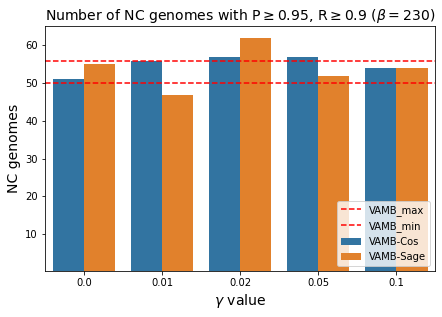

In [13]:
df_gamma_list = []
for i, gamma in enumerate(gamma_list):
    df = pd.DataFrame({'Bench':[benchs_gamma_list[i][3]]})
    df['gamma'] = gamma
    df_gamma_list.append(df)
df_gamma = pd.concat(df_gamma_list)
df_gamma['model'] = 'VAMB-Sage'

df_gamma_list_cos = []
for i, gamma in enumerate(gamma_list):
    df = pd.DataFrame({'Bench':[benchs_gamma_list_cos[i][3]]})
    df['gamma'] = gamma
    df_gamma_list_cos.append(df)
df_gamma_cos = pd.concat(df_gamma_list_cos)
df_gamma_cos['model'] = 'VAMB-Cos'

df_both = pd.concat([df_gamma_cos,df_gamma])


fig, ax = plt.subplots(figsize=(7, 4.5))
sns.barplot(data=df_both,x='gamma',y='Bench',hue='model')
ax.axhline(y=benchs_ori_max[3],linestyle='--',color='red',label='VAMB_max')
ax.axhline(y=benchs_ori_min[3],linestyle='--',color='red',label='VAMB_min')
ax.set_xlabel(r'$\gamma$ value',fontdict={'fontsize':14})
ax.set_ylabel('NC genomes',fontdict={'fontsize':14})
ax.set_ylim(0.3)
ax.legend(loc='lower right')
ax.set_title(r'Number of NC genomes with P$\geq$0.95, R$\geq$0.9 ($\beta=230$)',fontdict={'fontsize':14})

plt.savefig('graphvamb_plot/bench_gamma09.png',dpi=300)

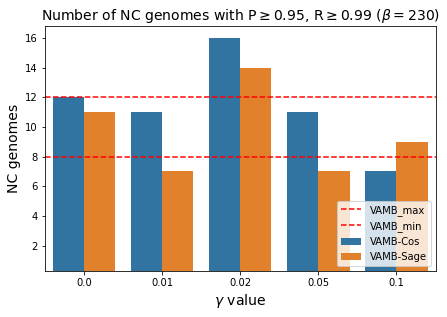

In [15]:

df_gamma_list = []
for i, gamma in enumerate(gamma_list):
    df = pd.DataFrame({'Bench':[benchs_gamma_list[i][5]]})
    df['gamma'] = gamma
    df_gamma_list.append(df)
df_gamma = pd.concat(df_gamma_list)
df_gamma['model'] = 'VAMB-Sage'

df_gamma_list_cos = []
for i, gamma in enumerate(gamma_list):
    df = pd.DataFrame({'Bench':[benchs_gamma_list_cos[i][5]]})
    df['gamma'] = gamma
    df_gamma_list_cos.append(df)
df_gamma_cos = pd.concat(df_gamma_list_cos)
df_gamma_cos['model'] = 'VAMB-Cos'

df_both = pd.concat([df_gamma_cos,df_gamma])


fig, ax = plt.subplots(figsize=(7, 4.5))
sns.barplot(data=df_both,x='gamma',y='Bench',hue='model')
ax.axhline(y=benchs_ori_max[5],linestyle='--',color='red',label='VAMB_max')
ax.axhline(y=benchs_ori_min[5],linestyle='--',color='red',label='VAMB_min')
ax.set_xlabel(r'$\gamma$ value',fontdict={'fontsize':14})
ax.set_ylabel('NC genomes',fontdict={'fontsize':14})
ax.set_ylim(0.3)
ax.legend(loc='lower right')
ax.set_title(r'Number of NC genomes with P$\geq$0.95, R$\geq$0.99 ($\beta=230$)',fontdict={'fontsize':14})

plt.savefig('graphvamb_plot/bench_gamma099.png',dpi=300)

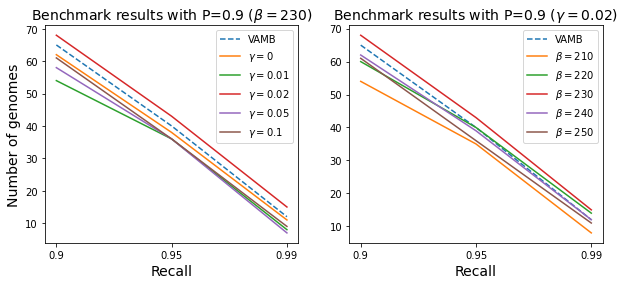

In [149]:
recall = ['0.6','0.7','0.8','0.9','0.95','0.99']

plt.figure(figsize=(10,4))
plt.subplot(1,2,1)
plt.plot(recall[3:],benchs_ori[3:],linestyle='--',label='VAMB')
for i, benchs in enumerate(benchs_gamma_list):
    plt.plot(recall[3:],benchs[3:],label=r'$\gamma={}$'.format(gamma_list[i]))
plt.legend()
plt.title(r'Benchmark results with P=0.9 ($\beta=230$)',fontdict={'fontsize':14})
plt.xlabel('Recall',fontdict={'fontsize':14})
plt.ylabel('Number of genomes',fontdict={'fontsize':14})

plt.subplot(1,2,2)
plt.plot(recall[3:],benchs_ori[3:],linestyle='--',label='VAMB')
for i, benchs in enumerate(benchs_beta_list):
    plt.plot(recall[3:],benchs[3:],label=r'$\beta={}$'.format(beta_list[i]))
plt.legend()
plt.title(r'Benchmark results with P=0.9 ($\gamma=0.02$)',fontdict={'fontsize':14})
plt.xlabel('Recall',fontdict={'fontsize':14})
# plt.ylabel('Number of genomes',fontdict={'fontsize':14})
plt.savefig('bench_curve_lossweight.png',dpi=300)

In [17]:
benchs_ori = read_bench('errorfree/thesis_ef/ori/bench_oral_0510ori_200_0.txt')

benchs_lin_cos = read_bench('errorfree/thesis_ef/lin_cos/bench_oral_0510_200_0.1.txt')
benchs_lin_sage = read_bench('errorfree/thesis_ef/lin_sage/bench_oral_0510_200_0.1.txt')
benchs_sage_cos = read_bench('errorfree/thesis_ef/sage_cos/bench_oral_0510_200_0.1.txt')
benchs_sage_sage = read_bench('errorfree/thesis_ef/sage_sage/bench_oral_0510_200_0.1.txt')

benchs_lin_cos_mu = read_bench('errorfree/thesis_ef/lin_cos/bench_oral_0510mu_200_0.1.txt')
benchs_lin_sage_mu = read_bench('errorfree/thesis_ef/lin_sage/bench_oral_0510mu_200_0.1.txt')
benchs_sage_cos_mu = read_bench('errorfree/thesis_ef/sage_cos/bench_oral_0510mu_200_0.1.txt')
benchs_sage_sage_mu = read_bench('errorfree/thesis_ef/sage_sage/bench_oral_0510mu_200_0.1.txt')

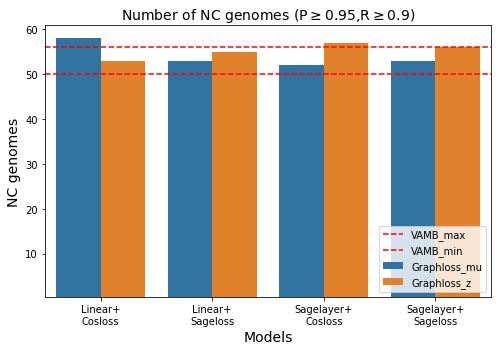

In [18]:
name_list = ['Linear+\nCosloss','Linear+\nSageloss','Sagelayer+\nCosloss','Sagelayer+\nSageloss']
benchs_z = [benchs_lin_cos,benchs_lin_sage,benchs_sage_cos,benchs_sage_sage]

df_z_list = []
for i, model_name in enumerate(name_list):
    df = pd.DataFrame({'Bench':[benchs_z[i][3]]})
    df['model'] = model_name
    df_z_list.append(df)
df_z = pd.concat(df_z_list)
df_z['latent'] = 'Graphloss_z'

benchs_mu = [benchs_lin_cos_mu,benchs_lin_sage_mu,benchs_sage_cos_mu,benchs_sage_sage_mu]

df_mu_list = []
for i, model_name in enumerate(name_list):
    df = pd.DataFrame({'Bench':[benchs_mu[i][3]]})
    df['model'] = model_name
    df_mu_list.append(df)
df_mu = pd.concat(df_mu_list)
df_mu['latent'] = 'Graphloss_mu'

df_both = pd.concat([df_mu,df_z])


fig, ax = plt.subplots(figsize=(8, 5))
sns.barplot(data=df_both,x='model',y='Bench',hue='latent')
# ax.axhline(y=benchs_ori[3],linestyle='--',color='red',label='VAMB')
ax.axhline(y=benchs_ori_max[3],linestyle='--',color='red',label='VAMB_max')
ax.axhline(y=benchs_ori_min[3],linestyle='--',color='red',label='VAMB_min')
ax.set_xlabel('Models',fontdict={'fontsize':14})
ax.set_ylabel('NC genomes',fontdict={'fontsize':14})
ax.set_ylim(0.3)
ax.legend(loc='lower right')
ax.set_title(r'Number of NC genomes (P$\geq$0.95,R$\geq$0.9)',fontdict={'fontsize':14})

plt.savefig('graphvamb_plot/bench_models09.png',dpi=300)

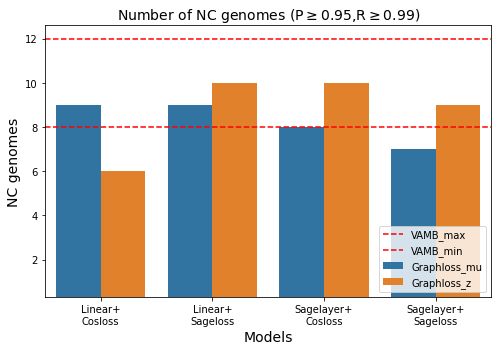

In [19]:
name_list = ['Linear+\nCosloss','Linear+\nSageloss','Sagelayer+\nCosloss','Sagelayer+\nSageloss']
benchs_z = [benchs_lin_cos,benchs_lin_sage,benchs_sage_cos,benchs_sage_sage]

df_z_list = []
for i, model_name in enumerate(name_list):
    df = pd.DataFrame({'Bench':[benchs_z[i][5]]})
    df['model'] = model_name
    df_z_list.append(df)
df_z = pd.concat(df_z_list)
df_z['latent'] = 'Graphloss_z'

benchs_mu = [benchs_lin_cos_mu,benchs_lin_sage_mu,benchs_sage_cos_mu,benchs_sage_sage_mu]

df_mu_list = []
for i, model_name in enumerate(name_list):
    df = pd.DataFrame({'Bench':[benchs_mu[i][5]]})
    df['model'] = model_name
    df_mu_list.append(df)
df_mu = pd.concat(df_mu_list)
df_mu['latent'] = 'Graphloss_mu'

df_both = pd.concat([df_mu,df_z])


fig, ax = plt.subplots(figsize=(8, 5))
sns.barplot(data=df_both,x='model',y='Bench',hue='latent')
# ax.axhline(y=benchs_ori[5],linestyle='--',color='red',label='VAMB')
ax.axhline(y=benchs_ori_max[5],linestyle='--',color='red',label='VAMB_max')
ax.axhline(y=benchs_ori_min[5],linestyle='--',color='red',label='VAMB_min')
ax.set_xlabel('Models',fontdict={'fontsize':14})
ax.set_ylabel('NC genomes',fontdict={'fontsize':14})
ax.set_ylim(0.3)
ax.legend(loc='lower right')
ax.set_title(r'Number of NC genomes (P$\geq$0.95,R$\geq$0.99)',fontdict={'fontsize':14})

plt.savefig('graphvamb_plot/bench_models099.png',dpi=300)